In [21]:
import pandas as pd # para leitura de base de dados e manipulação de data frame
import numpy as np # para álgebra linear
import altair as alt # para plotar gráficos

In [22]:
class LinearRegression():
    
    def cost_function(self,X,y,theta):
        m = len(y) #número de amostras
        J = 0 # custo
        
        for i in range(m):
            J = J + np.power((theta[0] + theta[1] * X[1][i] - y[i]),2)
        
        return J*(1/(2*m))
    
    def gradient_descent(self,X,y,theta,alpha,num_iter):
        m = len(y)
        J_history = np.zeros(num_iter)
        temp0 = 0
        temp1 = 0
        
        for k in range(num_iter):
        
            for i in range(m):
                temp0 = temp0 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))
                temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X[1][i] - y[i]))*X[1][i]
                theta[0] = temp0
                theta[1] = temp1
                
            J_history[k] = self.cost_function(X,y,theta)
    
        return theta,J_history
            
        
        

In [25]:
data = pd.read_csv('ex1data1.txt',header=None) # faz a leitura dos dados
data.columns = ['A', 'B']
data.head() #mostra as 5 primeiras linhas

,A,B
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


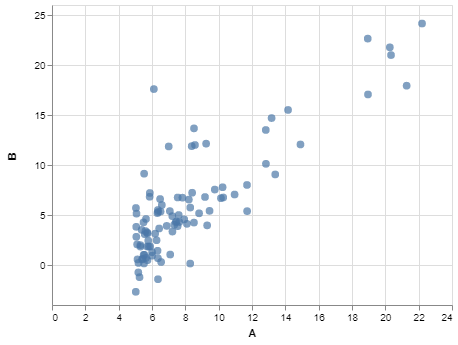

In [26]:
data_plot = alt.Chart(data).mark_circle(size=60).encode(
    x='A:Q',
    y='B:Q'
)
data_plot

In [44]:
x = data.iloc[0:,0:1] #dados de treinamento
ones = np.ones(len(data)) 
x.insert(0,len(x.columns) + 1,ones)
y = data.iloc[:,1]
theta = np.zeros(len(x.columns))
x.columns = range(x.shape[1])
iterations = 1500
alpha = 0.01

In [45]:
x

,0,1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598
5,1.0,8.3829
6,1.0,7.4764
7,1.0,8.5781
8,1.0,6.4862
9,1.0,5.0546


In [46]:
theta

array([0., 0.])

In [47]:
lr = LinearRegression()

In [48]:
custo = lr.cost_function(x,y,theta)
custo

32.072733877455654

In [49]:
theta

array([0., 0.])

In [32]:
theta_lr, custo_h = lr.gradient_descent(x,y,theta,alpha,iterations)
theta_lr

array([-3.58838901,  1.12366721])

In [33]:
Yfit = np.matmul(x,theta_lr)
Yfit

array([ 3.27733001,  2.62290622,  5.98368248,  4.28087719,  2.9960761 ,
        5.83120084,  4.81259651,  6.05054068,  3.69994124,  2.09129927,
        2.82853732, 12.32723334,  2.85471877,  5.85985435,  2.74988062,
        2.45626638,  3.56420224,  2.17613614,  3.63634168,  4.35683709,
        3.36609971, 19.18834532,  2.58065634,  3.52004212,  2.66470664,
       17.69948627, 10.82601395,  8.7236326 , 11.21705014, 21.36039404,
        2.31356064,  3.8159037 ,  6.80351007,  3.03203345,  5.63815481,
        5.32611243,  5.50870835,  2.71122647, 10.83500329,  3.55071824,
        2.48716722,  4.14525056,  9.56750668,  2.89932836,  5.2039698 ,
        4.38189487,  2.10882847,  2.93045394,  9.55851734,  2.6385252 ,
        4.88428648,  2.37569944,  4.75360398,  4.95496515,  3.52757069,
        3.55689841,  3.46172379,  2.74875695,  6.87317744,  7.03431132,
        6.32842358,  2.23142057, 20.32212553, 13.16324174, 17.71521761,
        4.52246564,  5.73254286,  7.91346854,  2.59110644, 19.26

In [34]:
fit_plot = pd.DataFrame({'X':x[1],'Y':Yfit})

In [35]:
polynomial_fit = alt.Chart(fit_plot).mark_line(color='red').encode(
    x=alt.X('X',axis=alt.Axis(title='population')),
    y=alt.Y('Y',axis=alt.Axis(title='profit'))
)

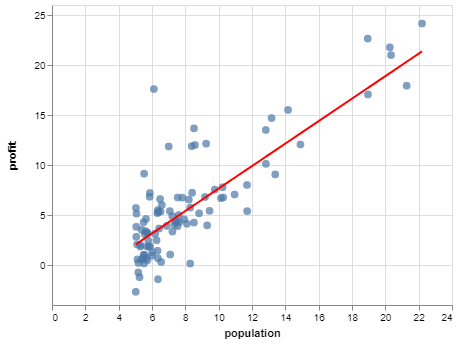

In [36]:
data_plot + polynomial_fit

In [40]:
it = list(range(1,1501))
df_custo = pd.DataFrame({'Iteracoes':it,'Custo':custo_h})

In [41]:
custo_plot = alt.Chart(df_custo).mark_line(color='red').encode(
    x=alt.X('Iteracoes',axis=alt.Axis(title='Iterações')),
    y=alt.Y('Custo',axis=alt.Axis(title='Custo'))
)

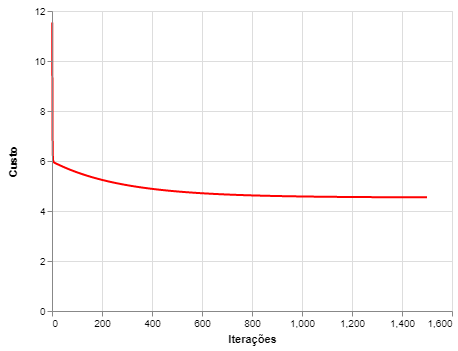

In [39]:
custo_plot